In [348]:
import seaborn as sns
import pandas as pd
import numpy as np

In [349]:
caller = 'activation' #outrider_overexpressed/outrider_underexpressed/activation

In [350]:
input_dir = '/s/project/mll/sergey/effect_prediction/promoter_mutations/res/'

In [351]:
all_mutations_df = pd.read_csv(input_dir + caller + '.csv')
most_sign_mutations_df = pd.read_csv(input_dir + caller + '_most_significant.csv')

most_sign_mutations_df['selection'] = 'At most three'
all_mutations_df['selection'] = 'All'

res_df = pd.concat([all_mutations_df,most_sign_mutations_df])

res_df = res_df[res_df.Confounders==True]

res_df['n_mutated'] = res_df['Mutated in anomal expr.'] + res_df['Mutated in normal expr.']

res_df.Mutation = res_df.Mutation.map({'promoter':'promoter','structural':'structural',
                                      'copy_number': 'copy number', 'splicing': 'splicing',
                                      'frameshift': 'frameshift', 'stop_gained': 'stop gained',
                                      'NMD_transcript':'NMD'})

res_df['sign_stars'] = res_df['p-value'].apply(lambda x: '****' if x<1e-4 else '***' 
                                               if x<1e-3 else '**' if x<1e-2 else '*' if x<5e-2 else 'ns')

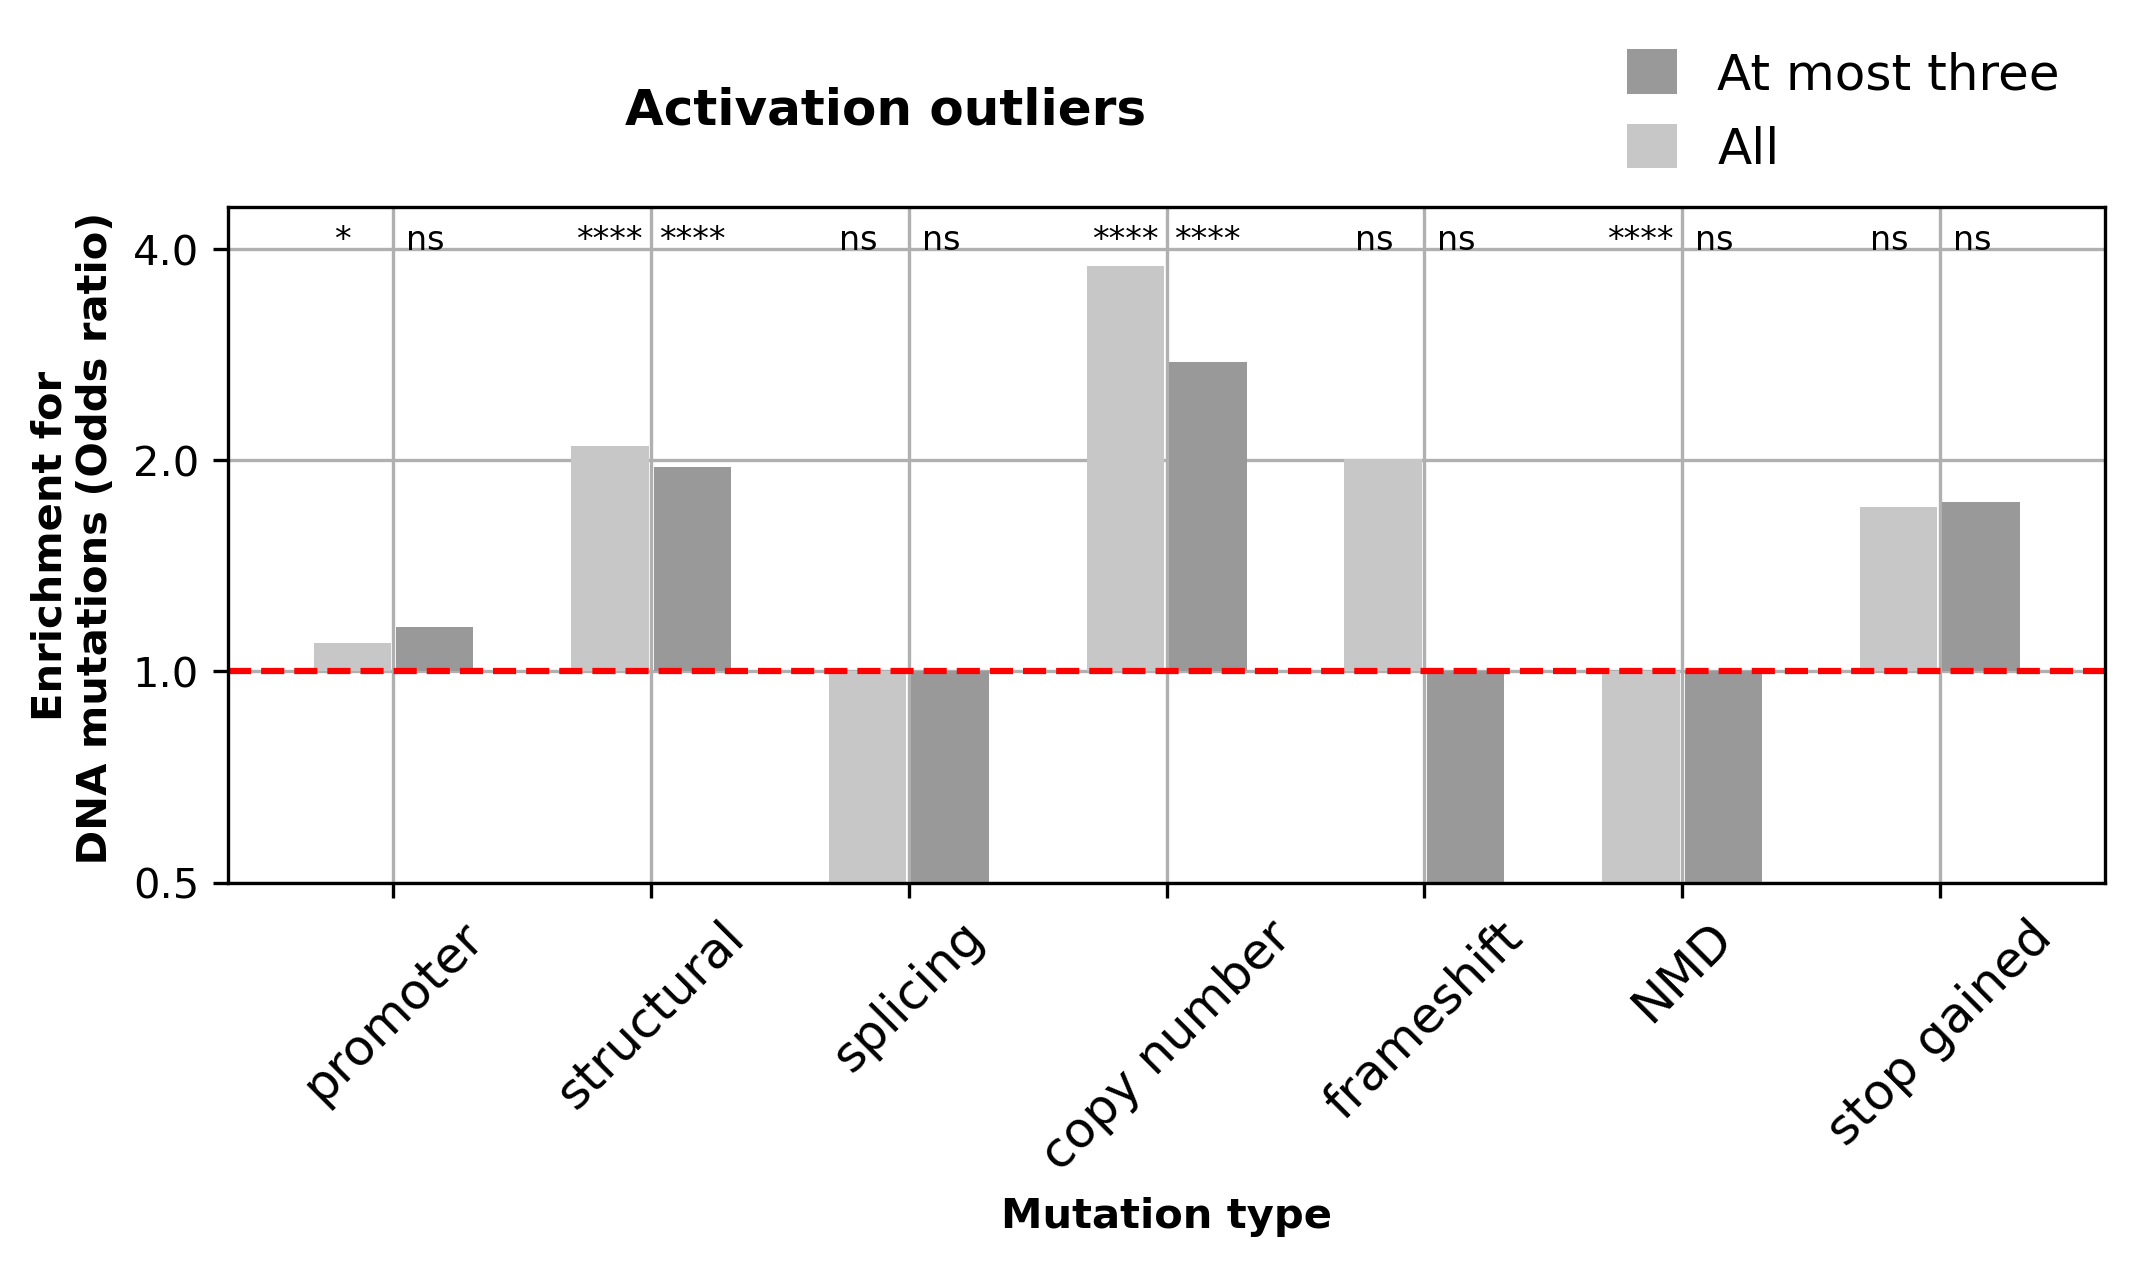

In [353]:
mutations = res_df.Mutation.unique()
selection = {
    'All': res_df[res_df.selection=='All'].Odds_ratio,
    'At most three': res_df[res_df.selection=='At most three'].Odds_ratio,
}

x = np.arange(len(mutations))  # the label locations

threshold = 1

colors = {'All':(0.78,0.78,0.78),'At most three':(0.6,0.6,0.6)}
width = 0.3  # the width of the bars
inner_gap = 0.02

fig, ax = plt.subplots(layout='constrained', dpi=300, figsize=(7,4))

multiplier = 0

y_max_pow = np.ceil(np.log2(res_df.Odds_ratio.max()))


for selection in ('All', 'At most three'):
    
    offset = (width+inner_gap) * multiplier
    
    measurement = res_df[res_df.selection==selection].Odds_ratio
    
    values = [x-threshold if x>threshold else threshold-x for x in measurement]
    bottom = [threshold if x>threshold else x for x in measurement]
 
    rects = ax.bar(x + offset, values, width, bottom=bottom, label=selection, color=colors[selection])
    
    for text_idx, text in enumerate(res_df[res_df.selection==selection].sign_stars):
        ax.text(y=2**(y_max_pow-0.), x=text_idx + offset-width/2+0.08/len(text), s = text, fontsize=8)
    
    multiplier += 1

if caller=='outrider_underexpressed':
    plot_title = 'Underexpression outliers (OUTRIDER)'
elif caller=='outrider_overexpressed':
    plot_title = 'Overexpression outliers (OUTRIDER)'
else:
    plot_title = 'Activation outliers'
    

ax.axhline(1, linestyle='--',color='r')

ax.set_yscale('log', base=2)

ax.set_title(plot_title, fontweight="bold", x=0.35, pad=20.)
ax.set_ylabel('Enrichment for\n DNA mutations (Odds ratio)', fontweight="bold")
ax.set_xlabel('Mutation type', fontweight="bold")
ax.set_xticks(x + width/2 + inner_gap/2, mutations, rotation=45, fontsize=12)


ax.set_yticks(2.**np.arange(-1, y_max_pow+1))
ax.set_yticklabels(2.**np.arange(-1, y_max_pow+1))

ax.set_ylim((2**-1,2**(y_max_pow+0.2)))

ax.grid()
ax.set_axisbelow(True)

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[::-1], labels[::-1],loc='upper right', 
          handlelength=1, handleheight=1,
          bbox_to_anchor=(1, 1.3), fontsize=12,  frameon=False)

plt.show()


In [317]:
res_df

,Confounders,Mutation,Total pairs normal,Total pairs abnormal,Mutated in anomal expr.,Mutated in normal expr.,Odds_ratio,p-value,selection,n_mutated,sign_stars
7,True,promoter,26732506,21751,1231,1217895,1.242249,4.811482e-14,All,1219126,****
8,True,structural,26732506,21751,1763,554992,3.904146,0.000000e+00,All,556755,****
9,True,splicing,26732506,21751,138,17172,9.876854,1.685993e-85,All,17310,****
10,True,copy number,26732506,21751,6921,1356057,6.272654,0.000000e+00,All,1362978,****
11,True,frameshift,26732506,21751,153,11013,17.074431,5.554556e-128,All,11166,****
12,True,NMD,26732506,21751,44,101388,0.533368,5.461997e-06,All,101432,****
13,True,stop gained,26732506,21751,106,8614,15.123818,5.200734e-84,All,8720,****
7,True,promoter,26732506,7322,536,1217895,1.606811,1.070623e-25,At most three,1218431,****
8,True,structural,26732506,7322,840,554992,5.525894,0.000000e+00,At most three,555832,****
9,True,splicing,26732506,7322,94,17172,19.985588,1.038594e-85,At most three,17266,****
